# Analise de textos com python

Neste exemplo vamos analisar os textos que tenham similariedade e tentar prever o sentimento de novos exemplos;

## Dataset

Vamos criar um dataset com alguns exemplos de frases sobre gatos e classifica-las com um sentimento: positivo ou negativo.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./datasets/sentimentos.csv")

In [3]:
df.head()

,Texto,Sentimento
0,este trabalho e agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje porque eu gostei,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você e,alegria


In [4]:
df['Sentimento'].value_counts()

alegria     162
medo        156
raiva       152
tristeza    149
nojo        143
surpresa    141
Name: Sentimento, dtype: int64

## Pré-processamento

Vamos efetuar um pré-processamento a fim de padronizar as informações entre os textos a fim de obter uma melhor comparação entre os registros.

Aqui vamos aplicar os seguintes processamentos:

* Quebra da frase em palavras
* Remoção de pontuação
* Remoção de palavras que não auxiliam a análise (stop words)
* Stemmer: Extrair o radical de cada palavra, obtendo assim a palavra em seu estado puro.

In [5]:
import nltk
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
language = 'portuguese'

stemmer = RSLPStemmer()
stop_words = nltk.corpus.stopwords.words(language)

def process(text: str) -> str:
    words = word_tokenize(text, language=language)
    words = [stemmer.stem(word) for word in words if (word not in stop_words 
                                                      and word.isalnum())]
    return ' '.join(words)

In [7]:
process('Hoje a tarde eu vou ao fliperama jogar o novo lançamento: Asteroids!!')

'hoj tard vou fliperam jog nov lanç asteroid'

### Aplicação do pré-processamento

Vamos aplicar no dataset o pré-processamento e criar uma nova coluna para armazenar essa informação.

In [8]:
df['TextoProcessado'] = df['Texto'].apply(process)

In [9]:
df.sample(4)

,Texto,Sentimento,TextoProcessado
14,a dor esta amenizando finalmente,alegria,dor ameniz final
739,daqui alguns meses vou embora deste pais que j...,nojo,daqu algum mes vou emb dest pal nause
280,os tubarões estão atacando!,medo,tub atac
541,"ele entrou em coma para sempre, que dó",tristeza,entr com sempr dó


## Termos frequentes

Para o próximo passo vamos verificar quais palavras mais se repetem

In [10]:
import wordcloud
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [11]:
words = []
for words_ in df.TextoProcessado.str.split():
    words.extend(words_)

frequency = nltk.FreqDist(words)
frequency.most_common(5)

[('vou', 32), ('nao', 30), ('quer', 23), ('tão', 22), ('tod', 20)]

In [12]:
import operator
top20 = sorted(frequency.items(), key=operator.itemgetter(1), reverse=True)[0:20]

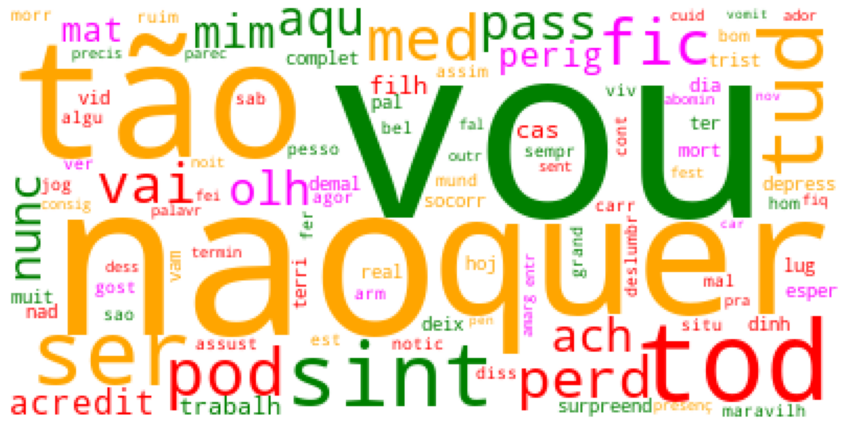

In [13]:
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])
cloud = wordcloud.WordCloud(background_color='white', max_words=100, colormap=color_map)
cloud = cloud.generate(df['TextoProcessado'].str.cat(sep='\n'))

plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

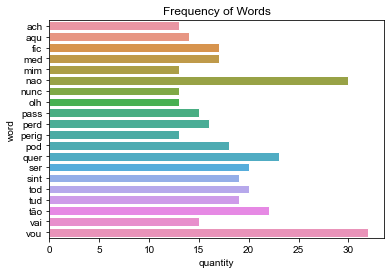

In [14]:
data = pd.DataFrame(top20, columns=["word", "quantity"])
data.word = data.word.astype('category')

plt.title('Frequency of Words')
sns.set(rc={'figure.figsize': (20,18)})
sns.barplot(y='word', x='quantity', data=data);

## Matriz de termos

Vamos utilizar agora o [TF-ID](https://pt.wikipedia.org/wiki/Tf%E2%80%93idf) para gerar uma matriz com os valores de importância de cada palavra em relação ao documento e ao corpus

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer()
vectorize = tfidf.fit_transform(df['TextoProcessado'])

In [17]:
print('Quntidade de palavras: ', len(tfidf.get_feature_names()))

Quntidade de palavras:  1129


In [18]:
print('Vocabulario:', tfidf.vocabulary_)

Vocabulario: {'trabalh': 1057, 'agrad': 46, 'gost': 591, 'fic': 546, 'aconcheg': 17, 'fiz': 555, 'ades': 21, 'curs': 319, 'hoj': 608, 'porqu': 862, 'admir': 23, 'muit': 755, 'ador': 25, 'cabel': 196, 'maci': 703, 'cor': 294, 'olh': 800, 'tão': 1070, 'am': 67, 'outr': 808, 'sint': 992, 'grand': 594, 'afe': 29, 'quer': 910, 'filh': 549, 'complet': 268, 'amo': 77, 'alivi': 63, 'feliz': 540, 'ano': 87, 'nov': 788, 'dor': 431, 'ameniz': 73, 'final': 551, 'ach': 15, 'apaixon': 96, 'maravilh': 720, 'sent': 979, 'anim': 83, 'bem': 167, 'lu': 697, 'bel': 166, 'dia': 402, 'bonit': 182, 'afortun': 35, 'mund': 758, 'receb': 922, 'car': 216, 'coleg': 254, 'reconfort': 926, 'bom': 180, 'est': 499, 'amig': 74, 'cont': 288, 'result': 936, 'test': 1041, 'pint': 849, 'brilh': 188, 'otim': 807, 'águ': 1123, 'abundanc': 12, 'roup': 947, 'delic': 339, 'comedi': 259, 'bondad': 181, 'vir': 1106, 'aqu': 112, 'lind': 688, 'amizad': 76, 'vai': 1080, 'dur': 436, 'sempr': 977, 'eufór': 509, 'notic': 785, 'real': 

In [19]:
df_vectorize = pd.DataFrame(vectorize.toarray(), columns=tfidf.get_feature_names())
df_vectorize.head()

,abal,abandon,abat,abism,abomin,abomina,aborrec,aborreç,abort,abraç,...,vão,vê,vítim,walt,águ,ânim,ímpet,ódi,órg,ótim
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Previsão de sentimentos

Vamos agora criar um modelo que possa prever o sentimento de cada frase.

Inicialmente vamos separar a base em treino e teste para podermos validar o quao bem o modelo generaliza.

In [20]:
df['Class'] = df['Sentimento'].map({'alegria': 0, 'medo': 1, 'nojo': 2, 'raiva': 3, 'surpresa': 4, 'tristeza': 5})

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(df_vectorize, df['Class'], train_size=0.75, random_state=42)

def matriz_confusao(y_pred, y, labels):
    d = pd.DataFrame(confusion_matrix(y, y_pred), columns=labels)
    d.index = labels
    return d

In [22]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)

X_train:  (677, 1129)
X_test:  (226, 1129)


### Modelo Dummy

Vamos criar um modelo simples para ser nosso base line e poder validar a performance do modelo oficial posteriormente

In [23]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_train)

print('Treino'.center(20, '-'))
print(matriz_confusao(y_pred, y_train, dummy.classes_))

print('accuracy: ', accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

print()

print('Teste'.center(20,'-'))
y_pred_test = dummy.predict(X_test)
print(matriz_confusao(y_pred_test, y_test, dummy.classes_))
print()
print('accuracy: ', accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

-------Treino-------
    0   1   2   3   4   5
0  26  19  15  20  21  18
1  22  18  20  16  18  16
2  18  21  16  20  19  22
3  23  19  13  19  17  22
4  22  12  19  25   9  21
5  19  19  22  11  18  22
accuracy:  0.16248153618906944
              precision    recall  f1-score   support

           0       0.20      0.22      0.21       119
           1       0.17      0.16      0.17       110
           2       0.15      0.14      0.14       116
           3       0.17      0.17      0.17       113
           4       0.09      0.08      0.09       108
           5       0.18      0.20      0.19       111

    accuracy                           0.16       677
   macro avg       0.16      0.16      0.16       677
weighted avg       0.16      0.16      0.16       677


-------Teste--------
   0   1  2  3  4   5
0  9   7  7  3  9   8
1  5  14  4  4  9  10
2  5   5  6  5  4   2
3  9   6  6  7  4   7
4  6   6  2  5  7   7
5  4  10  7  2  6   9

accuracy:  0.23008849557522124
              p

### Definição do modelo

Vamos utilizar o modelo do tipo Supert Vector Machine para treinar nosso modelo.

In [24]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

#### Vamos analisar como o nosso modelo performou

In [25]:
matriz_confusao(y_train, y_pred, model.classes_)

,0,1,2,3,4,5
0,119,0,0,1,1,1
1,0,110,0,0,0,0
2,0,0,116,1,0,0
3,0,0,0,111,0,0
4,0,0,0,0,107,0
5,0,0,0,0,0,110


In [26]:
print('accuracy: ', accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

accuracy:  0.9940915805022157
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       119
           1       1.00      1.00      1.00       110
           2       0.99      1.00      1.00       116
           3       1.00      0.98      0.99       113
           4       1.00      0.99      1.00       108
           5       1.00      0.99      1.00       111

    accuracy                           0.99       677
   macro avg       0.99      0.99      0.99       677
weighted avg       0.99      0.99      0.99       677



#### Vamos agora validar nosso modelo na base de teste para ver o quao bem ele generaliza em dados que não conhece

In [27]:
y_pred_test = model.predict(X_test)
matriz_confusao(y_pred_test, y_test, model.classes_)

,0,1,2,3,4,5
0,30,1,1,8,1,2
1,8,13,6,14,2,3
2,4,2,16,5,0,0
3,14,2,1,15,2,5
4,11,2,3,2,14,1
5,7,3,5,5,1,17


In [28]:
print('accuracy: ', accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

accuracy:  0.4646017699115044
              precision    recall  f1-score   support

           0       0.41      0.70      0.51        43
           1       0.57      0.28      0.38        46
           2       0.50      0.59      0.54        27
           3       0.31      0.38      0.34        39
           4       0.70      0.42      0.53        33
           5       0.61      0.45      0.52        38

    accuracy                           0.46       226
   macro avg       0.51      0.47      0.47       226
weighted avg       0.51      0.46      0.46       226



### Agrupamento

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
vector_pca = pca.fit_transform(df_vectorize)

In [30]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=len(model.classes_), random_state=42)
labels = cluster.fit_predict(vector_pca)

[]

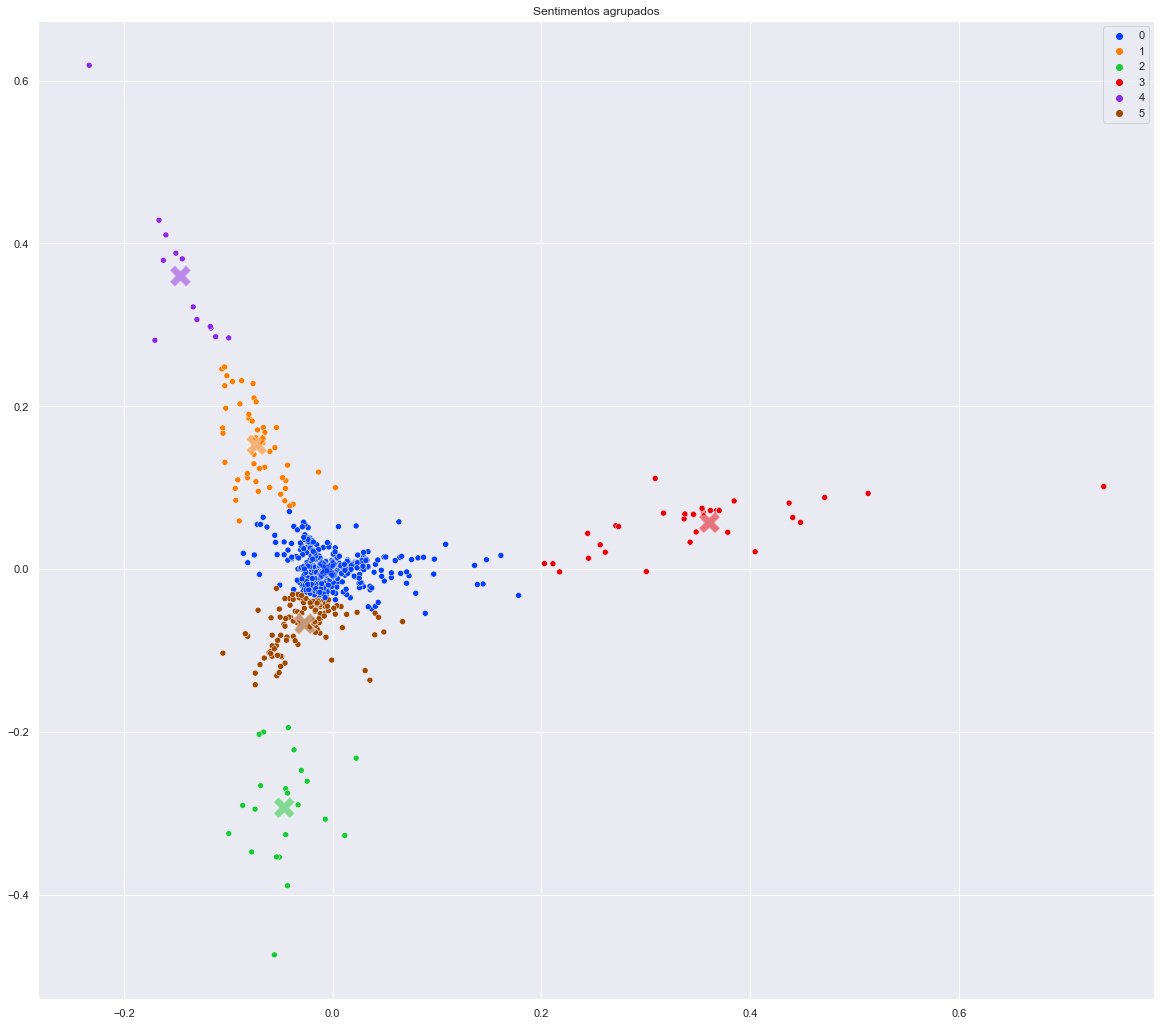

In [31]:
plt.title('Sentimentos agrupados')
palette = sns.color_palette('bright', len(set(labels)))
sns.set(rc={'figure.figsize': (12, 8)})
sns.scatterplot(vector_pca[:,0], vector_pca[:,1], hue=labels, palette=palette)
sns.scatterplot(cluster.cluster_centers_[:,0], cluster.cluster_centers_[:,1], c=palette, s=500, alpha=0.5, marker='X')
plt.plot()

In [35]:
 matriz_confusao(df['Class'], labels, model.classes_)

,0,1,2,3,4,5
0,123,109,121,110,96,107
1,13,6,8,4,12,8
2,3,4,1,7,3,4
3,3,11,4,14,2,2
4,9,0,0,1,1,2
5,11,26,9,16,27,26
